In [1]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt


from dataset import Dataset
from plot import Result, Method

/home/tianshu/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tqdm.notebook import tqdm

ds = Dataset("data.npz", offset=1000. * 1000.)

with open("results/manifest.json") as f:
    methods = json.load(f)
    
results = {
    method: Method("results/{}".format(method), ds, desc)
    for method, desc in tqdm(methods.items())
}

  0%|          | 0/8 [00:00<?, ?it/s]

In [37]:
from sklearn.manifold import TSNE
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler

def tsne(result):

    fig, axs = plt.subplots(1, 1, figsize=(16, 12))

    data = np.load(result.path)["module_emb"][0, 0]
    scaled = StandardScaler().fit_transform(data)
    
    xy = TSNE(
        n_components=2, random_state=0, perplexity=50).fit_transform(scaled)
    axs.scatter(xy[:, 0], xy[:, 1])

    texts = [
        axs.text(x, y, label.split('/')[-1])
        for (x, y), label in zip(xy, ds.modules)]
    adjust_text(texts)

/home/tianshu/anaconda3/envs/arena/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tianshu/anaconda3/envs/arena/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


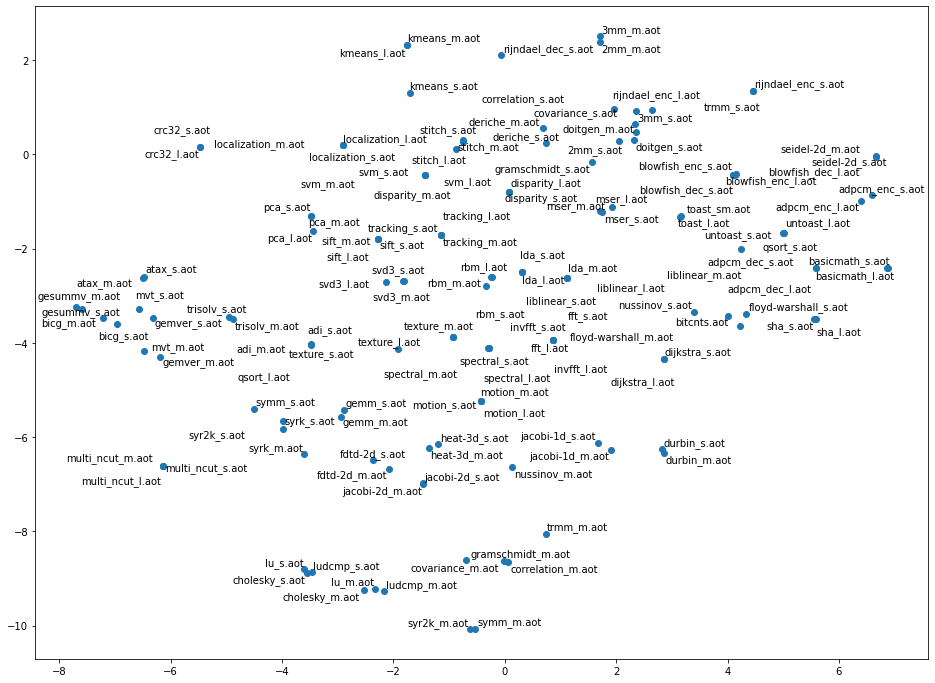

In [38]:
tsne(results["embedding"].results[-1])

/home/tianshu/anaconda3/envs/arena/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tianshu/anaconda3/envs/arena/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


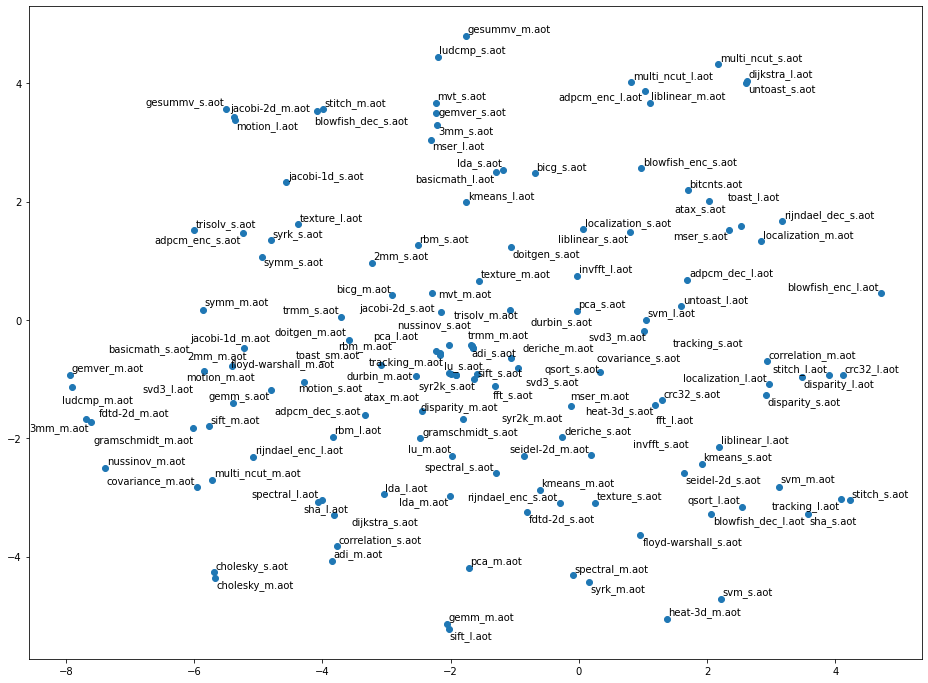

In [31]:
tsne(results["linear64"].results[-1])